In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Test TF installation

Import TensorFlow and tf.keras and print their versions.

In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.15.0'

## Use Keras to load Fashion MNIST dataset

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_test.shape

(10000, 28, 28)

Here are the corresponding class names:

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Image Classification

## Data Preparation


1) Divide X_train_full into a training set (X_train, y_train) and a validation set (X_valid, y_valid).

The dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now.

2) Since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats)

In [12]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [13]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [15]:
X_train.shape

(55000, 28, 28)

In [16]:
y_train.shape

(55000,)

In [17]:
X_valid.shape

(5000, 28, 28)

In [18]:
y_valid.shape

(5000,)

What the training data looks like?

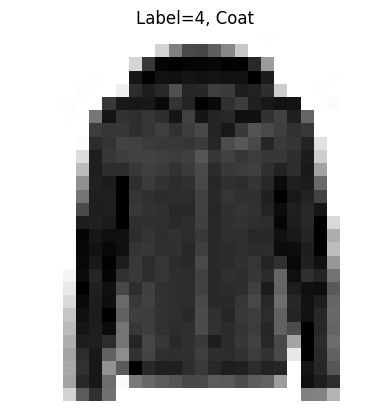

In [19]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.title('Label='+str(y_train[0])+', '+ class_names[y_train[0]])
plt.show()

## Build a Neural Network Model

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.layers

In [25]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [26]:
model.get_layer(hidden1.name) is hidden1

True

### Check parameters of a layer

In [27]:
weights, biases = hidden1.get_weights()

In [28]:
weights

array([[ 0.02854589,  0.04560287,  0.06080367, ...,  0.05634387,
        -0.01455689, -0.02720811],
       [-0.06737269, -0.05029549,  0.03231427, ...,  0.06189561,
        -0.04595692, -0.01228096],
       [-0.02352919, -0.03412754, -0.03499654, ...,  0.02556649,
        -0.01396157, -0.0080212 ],
       ...,
       [-0.06440262, -0.06318085,  0.0222386 , ...,  0.01224065,
        -0.03898513,  0.07012792],
       [ 0.00447171, -0.06319671,  0.04275096, ...,  0.03962722,
         0.0604949 , -0.03298952],
       [-0.04642122,  0.03479826, -0.00495507, ..., -0.07101522,
        -0.06619744, -0.07171482]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

* **Dense Layer** initialized the connection weights *randomly*
* **Biases** initialized to *0*

If you want to use a different initialization method, you can set *kernel_initializer* or *bias_initializer* when creating the layer.

## Compile the Model

Specify the loss function and the optimizer to use.

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Training and Evaluating the Model

In [33]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7189 - accuracy: 0.7588 - val_loss: 0.5328 - val_accuracy: 0.8170
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4902 - accuracy: 0.8278 - val_loss: 0.4378 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4440 - accuracy: 0.8441 - val_loss: 0.5510 - val_accuracy: 0.7926
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4169 - accuracy: 0.8544 - val_loss: 0.3948 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3981 - accuracy: 0.8603 - val_loss: 0.3782 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3801 - accuracy: 0.8651 - val_loss: 0.3719 - val_accuracy: 0.8698
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3680 - accuracy: 0.8693 - val_loss: 0.3696 - val_accuracy:

### Learning Curve

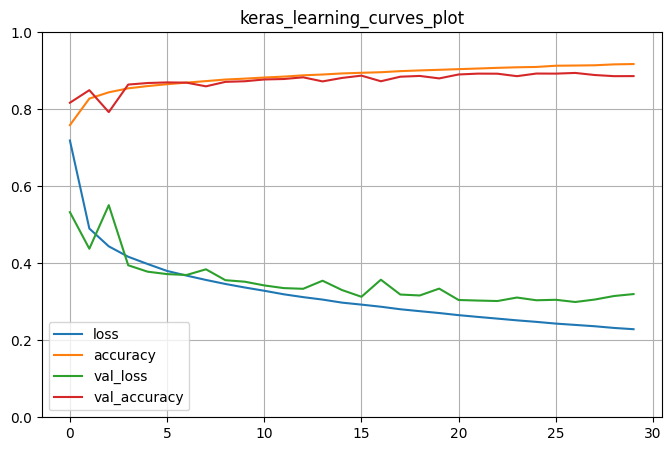

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("keras_learning_curves_plot")
plt.show()

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3491 - accuracy: 0.8783


[0.3491172790527344, 0.8783000111579895]

## Make New Predictions

Use predict() method to make predictions on test set.

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 231ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.96, 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 22ms/step


array([9, 2, 1])

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
# Below are the real labels:
y_test[:3]

array([9, 2, 1], dtype=uint8)

### Visualize the prediction

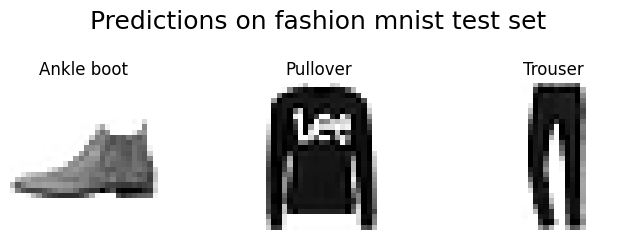

In [40]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.suptitle('Predictions on fashion mnist test set', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()